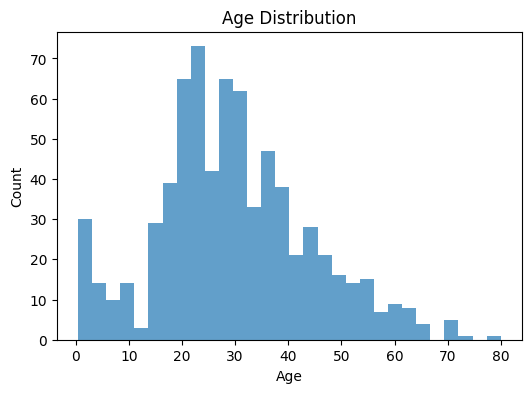

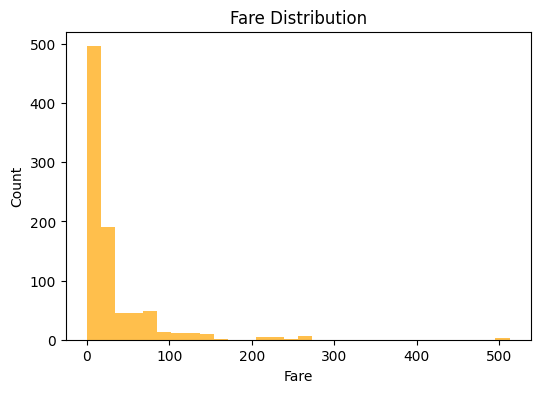

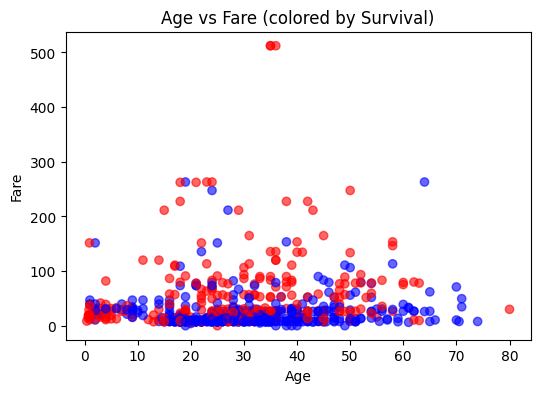

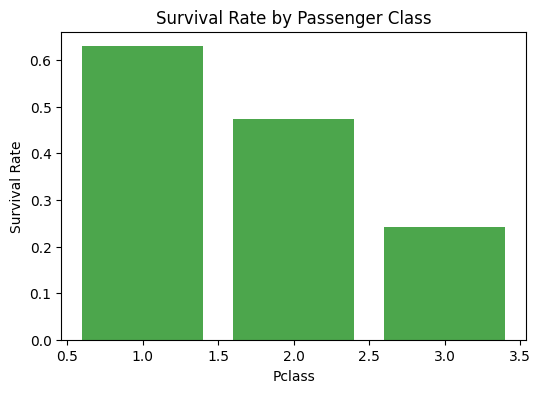

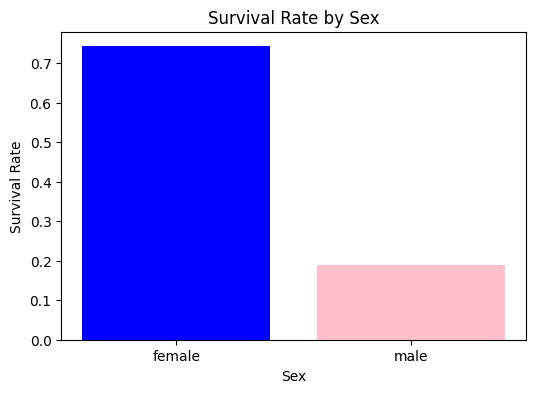

Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Saved: submission.csv


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# --- Data utilities ---
def load_data(path: str):
    return pd.read_csv(path)

def preprocess(df: pd.DataFrame):
    X = df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]].copy()
    y = df["Survived"].to_numpy() if "Survived" in df else None
    
    # Fill missing values
    X["Age"] = X["Age"].fillna(X["Age"].median())
    X["Fare"] = X["Fare"].fillna(X["Fare"].median())
    X["Embarked"] = X["Embarked"].fillna("S")
    
    # Encode categoricals
    X["Sex"] = (X["Sex"] == "female").astype(int)
    X["Embarked"] = X["Embarked"].map({"S":0,"C":1,"Q":2})
    
    return X.to_numpy(dtype=np.float64), y

# --- Model training ---
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    return model

# --- Submission ---
def make_submission(model, test_df, filename="submission.csv"):
    X_test, _ = preprocess(test_df)
    preds = model.predict(X_test)
    submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": preds
    })
    submission.to_csv(filename, index=False)
    print(f"Saved: {filename}")

# --- EDA Plots ---
def plot_eda(df):
    plt.figure(figsize=(6,4))
    plt.hist(df["Age"].dropna(), bins=30, alpha=0.7)
    plt.xlabel("Age"); plt.ylabel("Count")
    plt.title("Age Distribution"); plt.show()

    plt.figure(figsize=(6,4))
    plt.hist(df["Fare"].dropna(), bins=30, alpha=0.7, color="orange")
    plt.xlabel("Fare"); plt.ylabel("Count")
    plt.title("Fare Distribution"); plt.show()

    plt.figure(figsize=(6,4))
    plt.scatter(df["Age"], df["Fare"], c=df["Survived"], cmap="bwr", alpha=0.6)
    plt.xlabel("Age"); plt.ylabel("Fare")
    plt.title("Age vs Fare (colored by Survival)"); plt.show()

    plt.figure(figsize=(6,4))
    survival_rate = df.groupby("Pclass")["Survived"].mean()
    plt.bar(survival_rate.index, survival_rate.values, color="green", alpha=0.7)
    plt.xlabel("Pclass"); plt.ylabel("Survival Rate")
    plt.title("Survival Rate by Passenger Class"); plt.show()

    plt.figure(figsize=(6,4))
    sex_rate = df.groupby("Sex")["Survived"].mean()
    plt.bar(sex_rate.index, sex_rate.values, color=["blue","pink"])
    plt.xlabel("Sex"); plt.ylabel("Survival Rate")
    plt.title("Survival Rate by Sex"); plt.show()

# --- Main pipeline ---
if __name__ == "__main__":
    train_df = load_data("/kaggle/input/titanic/train.csv")
    test_df = load_data("/kaggle/input/titanic/test.csv")
    
    plot_eda(train_df)  # EDA
    
    X, y = preprocess(train_df)
    model = train_model(X, y)
    
    make_submission(model, test_df, "submission.csv")


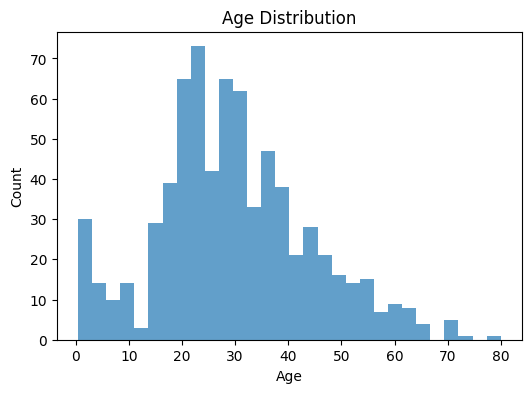

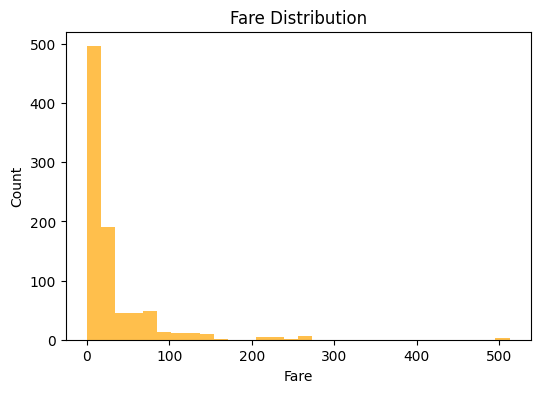

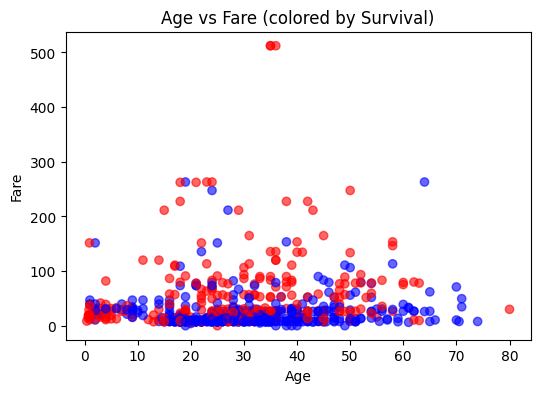

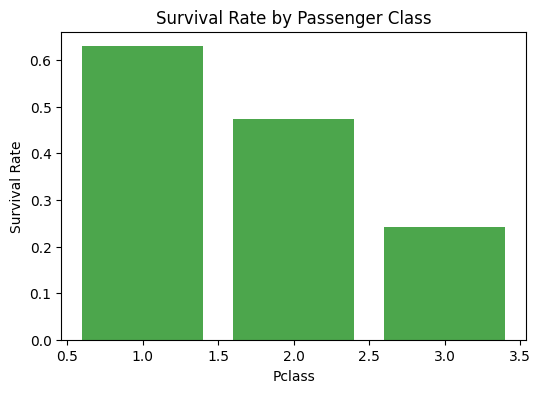

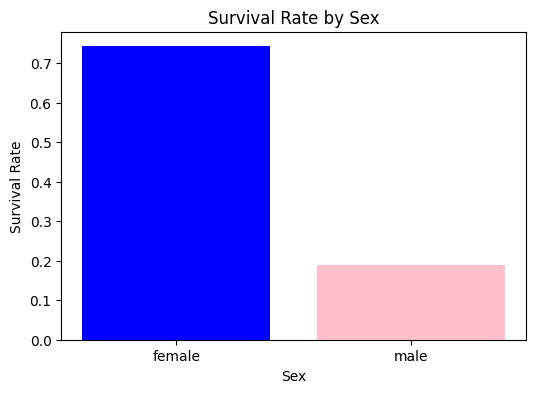

Accuracy: 0.7430167597765364

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.94      0.82       110
           1       0.81      0.43      0.57        69

    accuracy                           0.74       179
   macro avg       0.77      0.69      0.69       179
weighted avg       0.76      0.74      0.72       179

Saved: submission.csv


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# --- Data utilities ---
def load_data(path: str):
    return pd.read_csv(path)

def preprocess(df: pd.DataFrame):
    X = df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]].copy()
    y = df["Survived"].to_numpy() if "Survived" in df else None
    
    # Fill missing values
    X["Age"] = X["Age"].fillna(X["Age"].median())
    X["Fare"] = X["Fare"].fillna(X["Fare"].median())
    X["Embarked"] = X["Embarked"].fillna("S")
    
    # Encode categoricals
    X["Sex"] = (X["Sex"] == "female").astype(int)
    X["Embarked"] = X["Embarked"].map({"S":0,"C":1,"Q":2})
    
    return X.to_numpy(dtype=np.float64), y

# --- Model training ---
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    return model

# --- Submission ---
def make_submission(model, test_df, filename="submission.csv"):
    X_test, _ = preprocess(test_df)
    preds = model.predict(X_test)
    submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": preds
    })
    submission.to_csv(filename, index=False)
    print(f"Saved: {filename}")

# --- EDA Plots ---
def plot_eda(df):
    plt.figure(figsize=(6,4))
    plt.hist(df["Age"].dropna(), bins=30, alpha=0.7)
    plt.xlabel("Age"); plt.ylabel("Count")
    plt.title("Age Distribution"); plt.show()

    plt.figure(figsize=(6,4))
    plt.hist(df["Fare"].dropna(), bins=30, alpha=0.7, color="orange")
    plt.xlabel("Fare"); plt.ylabel("Count")
    plt.title("Fare Distribution"); plt.show()

    plt.figure(figsize=(6,4))
    plt.scatter(df["Age"], df["Fare"], c=df["Survived"], cmap="bwr", alpha=0.6)
    plt.xlabel("Age"); plt.ylabel("Fare")
    plt.title("Age vs Fare (colored by Survival)"); plt.show()

    plt.figure(figsize=(6,4))
    survival_rate = df.groupby("Pclass")["Survived"].mean()
    plt.bar(survival_rate.index, survival_rate.values, color="green", alpha=0.7)
    plt.xlabel("Pclass"); plt.ylabel("Survival Rate")
    plt.title("Survival Rate by Passenger Class"); plt.show()

    plt.figure(figsize=(6,4))
    sex_rate = df.groupby("Sex")["Survived"].mean()
    plt.bar(sex_rate.index, sex_rate.values, color=["blue","pink"])
    plt.xlabel("Sex"); plt.ylabel("Survival Rate")
    plt.title("Survival Rate by Sex"); plt.show()

# --- Main pipeline ---
if __name__ == "__main__":
    train_df = load_data("/kaggle/input/titanic/train.csv")
    test_df = load_data("/kaggle/input/titanic/test.csv")
    
    plot_eda(train_df)  # EDA
    
    X, y = preprocess(train_df)
    model = train_model(X, y)
    
    make_submission(model, test_df, "submission.csv")
